In [1]:
import numpy as np
import math
#learning data
Lrn_Dat=np.zeros(9000)
for i in range(5000):
    Lrn_Dat[i]=np.random.rand()*4-2
for i in range(5000,9000):
    Lrn_Dat[i] =1.05*math.sin(math.pi*i/45)

In [2]:
Lrn_Desire_Output=np.zeros(9001)
for k in range(3):
    Lrn_Desire_Output[k]=0

for k in range(2,9000):
    Lrn_Desire_Output[k+1] = (Lrn_Desire_Output[k]*Lrn_Desire_Output[k-1]*Lrn_Desire_Output[k-2]*Lrn_Dat[k-1]*(Lrn_Desire_Output[k-2]-1)+Lrn_Dat[k])/(1+Lrn_Desire_Output[k-2]**2+Lrn_Desire_Output[k-1]**2)

In [3]:
#test data
Test_Dat=np.zeros(1000)
for k in range (249):
    Test_Dat[k] = math.sin(math.pi*(k+1)/25)
for k in range (249,499):
    Test_Dat[k] = 1
for k in range (499,749):
    Test_Dat[k]=-1
for k in range (749,1000):
    Test_Dat[k]=0.3*math.sin(math.pi*(k+1)/25)+0.1*math.sin(math.pi*(k+1)/32)+0.6*math.sin(math.pi*(k+1)/10)

In [4]:
#Test_Desire_Output
Test_Desire_Output =np.zeros(1001)
Test_Desire_Output[0]=0
k=0
Test_Desire_Output[k+1] = (Test_Desire_Output[k]*0*0*0*(0-1)+Test_Dat[k])/(1+0**2+0**2)
k=1
Test_Desire_Output[k+1] = (Test_Desire_Output[k]*Test_Desire_Output[k-1]*0*Test_Dat[k-1]*(0-1)+Test_Dat[k])/(1+0**2+Test_Desire_Output[k-1]**2)
for k in range (2,1000):
    Test_Desire_Output[k+1] = (Test_Desire_Output[k]*Test_Desire_Output[k-1]*Test_Desire_Output[k-2]*Test_Dat[k-1]*(Test_Desire_Output[k-2]-1)+Test_Dat[k])/(1+Test_Desire_Output[k-2]**2+Test_Desire_Output[k-1]**2) 

In [5]:
P=Lrn_Dat[:].reshape(len(Lrn_Dat[:]),1)
T=Lrn_Desire_Output[1:9001].reshape(len(Lrn_Desire_Output[1:9001]),1)
Q=Test_Dat[1:1000].reshape(len(Test_Dat[1:1000]),1)

In [6]:
import neurolab as nl
net = nl.net.newelm([[-1, 1]], [10, 1], [nl.trans.TanSig(), nl.trans.PureLin()])
net.layers[0].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
net.layers[1].initf= nl.init.InitRand([-0.1, 0.1], 'wb')
net.init()
# 网络的初始化
error = net.train(P,T, epochs=2500, show=100, goal=0.01)

Epoch: 100; Error: 26293662398021.895;
Epoch: 200; Error: 22466278772.020905;
Epoch: 300; Error: 15928060892.92734;
Epoch: 400; Error: 57105365.397344574;
Epoch: 500; Error: 15917673.276045203;
Epoch: 600; Error: 304362.58397128293;
Epoch: 700; Error: 41230.25095688779;
Epoch: 800; Error: 872.4282098395622;
Epoch: 900; Error: 558.4104646012453;
Epoch: 1000; Error: 18.546837921827514;
Epoch: 1100; Error: 10.04627695830518;
Epoch: 1200; Error: 0.30559293383751396;
Epoch: 1300; Error: 0.2957474666511432;
Epoch: 1400; Error: 0.2935776742700293;
Epoch: 1500; Error: 0.3000399795752074;
Epoch: 1600; Error: 0.2946450283084173;
Epoch: 1700; Error: 0.29350904424506374;
Epoch: 1800; Error: 0.2941197151369123;
Epoch: 1900; Error: 0.31198321182112476;
Epoch: 2000; Error: 0.3077184660039623;
Epoch: 2100; Error: 0.2953891243524833;
Epoch: 2200; Error: 0.29507121244395706;
Epoch: 2300; Error: 0.29804575107785597;
Epoch: 2400; Error: 0.2936620257583715;
Epoch: 2500; Error: 0.2934831174148429;
The maxim

In [7]:
output = net.sim(Q)

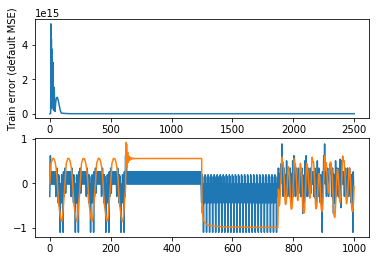

In [8]:
import matplotlib.pyplot as plt
plt.subplot(211)
plt.plot(error)
plt.xlabel('Epoch number')
plt.ylabel('Train error (default MSE)')

plt.subplot(212)
plt.plot(output[:1000])
plt.plot(Test_Desire_Output)
